---
title: "Лабораторна робота №11. Об'єктно-орієнтоване програмування. Частина І"
description:
  Документ зроблено в [Quarto](https://quarto.org/)
author: "&copy; [<span style='color: blue;'>Daniil Tereshchenko </span>](https://github.com/whytereshchenko), 2023"
date: "11.30.2023"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # fdnj
      number_sections: true
jupyter: python3
---

__Мета:__ _навчитися обробляти рядки за допомогою спеціальних функцій і методів._

::: callout-note
## Примітка
У лабораторній роботі використано матеріали [python institute.](https://pythoninstitute.org/pcep)
:::

## Що ви будете вміти?
* створювати класи та об'єкти у Python;
* реалізувати механізми інкапсуляції та наслідування;
* визначати власні винятки як клас і використовувати їх.

## Основи об'єктно-орієнтованого програмування на Python 

### Приклад 1

В лекції 12 було показано, як розширити можливості `Stack`, визначивши новий клас (тобто підклас), який зберігає усі успадковані риси та додає деякі нові.

Ваше завдання -- розширити поведінку класу `Stack` таким чином, щоб клас міг підраховувати всі елементи,
що додаються і видаляються (ми припускаємо, що підрахунку видалень достатньо). Використовуйте клас `Stack`, який надано нижче.

Дотримуйтесь підказок:

* додайте властивість, призначену для підрахунку операцій `pop`, і дайте йому ім'я, що гарантує його приховування;
* ініціалізуйте його нулем усередині конструктора;
* додайте метод, який повертає поточне значення, надане лічильнику (назвіть його `get_counter()`).
* перевірте код

In [8]:
class Stack:
    def __init__(self):
        self.__stk = []

    def push(self, val):
        self.__stk.append(val)

    def pop(self):
        val = self.__stk[-1]
        del self.__stk[-1]
        return val


class CountingStack(Stack):
    def __init__(self):
        Stack.__init__(self)
        self.__count = 0


    def get_counter(self):
        return self.__count


    def pop(self):
        val = Stack.pop(self)
        self.__count += 1
        return val



stk = CountingStack()
for i in range(100):
    stk.push(i)
    stk.pop()
print(stk.get_counter())

100


::: callout-important
## Важливо

Повторити, що таке структура даних черга.
:::

### Приклад 2

Як Ви вже знаєте, стек – це структура даних, що реалізує модель __LIFO (Last In – First Out)__.

Черга -– це модель даних, що характеризується терміном __FIFO: First In – Fist Out__. Примітка: звичайна черга, відома Вам з магазинів або поштових відділень, працює так само - першим обслуговується покупець, який прийшов першим.

Ваше завдання -– реалізувати клас `Queue` з двома основними операціями:

* `put(element)`, яка поміщає елемент на кінець черги;
* `get()`, яка бере елемент із початку черги і повертає його як результат (черга не може бути порожньою для успішного виконання).

Дотримуйтесь підказок:

* використовуйте список як сховище (як і у випадку зі стеком);
* `put()` повинен додавати елементи на початок списку, а get() повинен видаляти елементи з кінця списку;
* визначте новий виняток із ім'ям `QueueError` (виберіть виняток для його створення) та викличте його, коли `get()` спробує працювати з порожнім списком.

Протестуйте код, використовуючи надані нами дані.

### Очікуваний результат

`1`  
`dog`  
`False`  
`Queue error`  

In [1]:
class QueueError(Exception):   # Choose base class for the new exception.
    pass


class Queue:
    def __init__(self):
        self.list_queue = []

    def put(self, elem):
        self.list_queue.insert(0, elem)


    def get(self):
        if not len(self.list_queue):
            raise QueueError
        else:
            elem = self.list_queue.pop()
        return elem

    
#     Альтернативний варіант
    # def get(self):
    #     if len(self.queue) > 0:
    #         elem = self.queue[-1]
    #         del self.queue[-1]
    #         return elem
    #     else:
    #         raise QueueError

que = Queue()
que.put(1)
que.put("dog")
que.put(False)
# print(que.get())
try:
    for i in range(4):
        print(que.get())
except QueueError:
    print("Queue error")


1
dog
False
Queue error


### Завдання 1

Ваше завдання –- трохи розширити можливості класу `Queue` (див. попередній приклад). Нам потрібен метод без параметрів, який повертає `True`, якщо черга порожня, і `False` інакше.

Доповніть код, який надано нижче. Запустіть його, щоб перевірити, чи дає він результат, аналогічний нашому.

In [2]:
class QueueError(Exception):
    pass

class Queue:
    def __init__(self):
        self.items = []

    def put(self, item):
        self.items.append(item)

    def get(self):
        if not self.isempty():
            return self.items.pop(0)
        else:
            raise QueueError("Queue is empty")

    def isempty(self):
        return len(self.items) == 0

class SuperQueue(Queue):
    pass

que = SuperQueue()
que.put(1)
que.put("dog")
que.put(False)

for i in range(4):
    if not que.isempty():
        print(que.get())
    else:
        print("Queue empty")

1
dog
False
Queue empty


### Очікуваний результат

`1`  
`dog`  
`False`  
`Queue empty`  

## Завдання для самостіної роботи

1. Виконати приклади 1, 2 і завдання 1, наведені вище у цьому зошиті.

1. Створити файл __lab_11_StudentLastName.py__ з написаним кодом. 

1. Закомітити файл у локальний репозиторій.

1. Відправити ("запушити") поточну версію Git-проєкта у віддалений репозиторій на GitHub.

1. Звіт має складатися з файлу (за основу взяти __цей Python-зошит__)  `lab_11_StudentLastName.ipynb`. (Можливі якісь додакові файли)

## Контрольні запитання

1. У наступному оголошенні чогось не вистачає – чого?
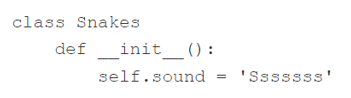

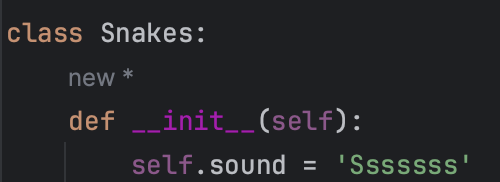

1. Припускаючи, що існує клас з ім'ям `Snake`, напишіть перший рядок оголошення класу Python, вказавши, що новий клас насправді є підкласом Snake.

1. Змініть код, щоб гарантувати, що властивість `venomous` є приватною.
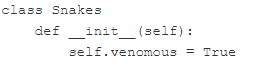

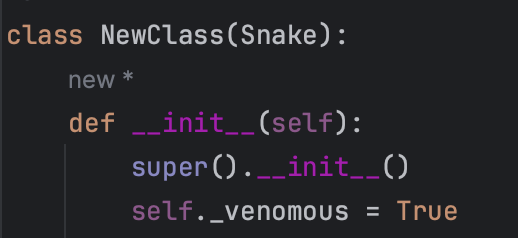

## References

1. [Anaconda (Python distribution)](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution))  
1. [Conda](https://conda.io/en/latest/)  
1. [Pro Git Book](https://git-scm.com/book/en/v2)  
1. [OpenEDG Python Institute](https://pythoninstitute.org/)  
1. [Cisco. Networking Academy](https://www.netacad.com/)  
1. [Научно-издательская система Quarto](https://data-visualization-blog.netlify.app/posts/quarto/)
1. [The Python Standard Library](https://docs.python.org/3/library/index.html)
1. [Callout Blocks. Markdown Syntax](https://quarto.org/docs/authoring/callouts.html)  
1. [5. Built-in Exceptions](https://docs.python.org/3.6/library/exceptions.html)